# Rank BM 25 Search Engine

## Configuration

In [1]:
%load_ext autotime

In [2]:
from rank_bm25 import *

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [3]:
path = os.getcwd()+'\\full_data\\'
print('Path: ', path)

Path:  C:\Users\ramos\OneDrive\Documents\SyracuseUniversity\9th_Quarter\IST736\Project\full_data\


## Analysis

### About the Data

In [4]:
df = pd.read_csv(path + 'mcu_data.csv', index_col=0).reset_index(drop=True)[['character', 'line', 'movie', 'year', 'words']]
print('Entries: ', len(df))
df.head()

Entries:  6509


character                                               line     movie  \
0  TONY STARK  Oh, I get it.  You guys aren’t allowed to talk...  Iron Man   
1  TONY STARK                     Oh.  I see.  So it’s personal.  Iron Man   
2  TONY STARK  Good God, you’re a woman. I, honestly, I could...  Iron Man   
3  TONY STARK                                            Please.  Iron Man   
4  TONY STARK  Excellent question. Yes and no. March and I ha...  Iron Man   

   year  words  
0  2008     22  
1  2008      8  
2  2008     31  
3  2008      1  
4  2008     28

In [6]:
df.groupby(['movie', 'year']).head(1)[['movie', 'year']]

movie  year
0                                Iron Man  2008
433                            Iron Man 2  2010
1104                                 Thor  2011
1364   Captain America: The First Avenger  2011
1556                         The Avengers  2012
2265                           Iron Man 3  2013
2797                 Thor: The Dark World  2013
3032  Captain America: The Winter Soldier  2014
3437              Avengers: Age of Ultron  2015
4006                              Ant-Man  2015
4010           Captain America: Civil War  2016
4494               Spider-Man: Homecoming  2017
5015                       Thor: Ragnarok  2017
5452               Avengers: Infinity War  2018
5822                       Captain Marvel  2019
5953                    Avengers: Endgame  2019

In [5]:
df.sample(20)[['character', 'line', 'movie', 'year']].head(20)

character                                               line  \
4526      PETER PARKER                                            Mm-hmm.   
4283        TONY STARK          Alright, Spider-Man.  Get me out of this.   
3915        TONY STARK  The spire's Vibranium. If I get Thor to hit it...   
4637      PETER PARKER        This is a mistake. Hey, let’s just go home.   
6157      BRUCE BANNER                 We didn’t say we were here to see-   
5877         NICK FURY                                  Well, she's dead.   
3542              THOR                            That's the whole story?   
2385      PEPPER POTTS                            It would be incredible.   
3606              THOR  Yes, well that's, uh, that's a very, very inte...   
1569         NICK FURY         That can be harmful. Where’s agent Barton?   
4781      PETER PARKER  I did it! Whoa! Ahem. Hey, how you doing? Don'...   
3753         NICK FURY  Artificial intelligence. You never even hesita...   
3975      STEVE ROGERS        Well, the Vision's artificial intelligence.   
2952              LOKI                                         I'm sorry.   
4517        TONY STARK          It’s all right. I’d probably do the same.   
3338  NATASHA ROMANOFF  Insight's launching in sixteen hours, we're cu...   
5399      BRUCE BANNER  None of them are for flying alien spaceships! ...   
3867              THOR                 The Avengers cannot defeat Ultron.   
3210      STEVE ROGERS                                      What's on it?   
2741      JAMES RHODES  This is how you've been managing your down tim...   

                                    movie  year  
4526               Spider-Man: Homecoming  2017  
4283           Captain America: Civil War  2016  
3915              Avengers: Age of Ultron  2015  
4637               Spider-Man: Homecoming  2017  
6157                    Avengers: Endgame  2019  
5877                       Captain Marvel  2019  
3542              Avengers: Age of Ultron  2015  
2385                           Iron Man 3  2013  
3606              Avengers: Age of Ultron  2015  
1569                         The Avengers  2012  
4781               Spider-Man: Homecoming  2017  
3753              Avengers: Age of Ultron  2015  
3975              Avengers: Age of Ultron  2015  
2952                 Thor: The Dark World  2013  
4517               Spider-Man: Homecoming  2017  
3338  Captain America: The Winter Soldier  2014  
5399                       Thor: Ragnarok  2017  
3867              Avengers: Age of Ultron  2015  
3210  Captain America: The Winter Soldier  2014  
2741                           Iron Man 3  2013

### Processing Data

In [6]:
### Define RegexpTokenizer Tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

### Define Unwanted Words / Punctuation
import re
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

### Define Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
lmt = WordNetLemmatizer()

### Define Stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def preprocess_text(doc):
    """
    Function used to preprocess review into a standarized format.
    The function tokenizes, standarizes, removes punctuation, removes stopwords, lemmatizes and stemms.
    """
    
    tokens = tokenizer.tokenize(doc)
    
    clean_tokL = []
    for tkn in tokens:
        
        ### Standarize Text
        # lower case
        tkn_processed = tkn.lower()
        # remove digits
        tkn_processed = re.sub(r'\d+', '', tkn_processed)
        # remove punctuation and special chars
        tkn_processed = re.sub(r'[^\w\s]+', ' ', tkn_processed)
        # strip whitespace
        tkn_processed = tkn_processed.strip()
        
        ### Remove Stop Words
        if tkn_processed in stopWords:
            continue
            
        ### Lemmatize
        # tkn_processed = lmt.lemmatize(tkn_processed)
        
        ### Stem Token
        # tkn_processed = stemmer.stem(tkn_processed)
            
        # If word is not empy, then add to document token list
        if tkn_processed != '':
            clean_tokL.append(tkn_processed)
            
    return clean_tokL

### Pre Process Reviews with Function
df['line_processed'] = [preprocess_text(doc) for doc in df['line'].values]

## Modeling

### Simple Search by Matching String Value

In [7]:
tokenized_corpus = df['line_processed'].values
bm25 = BM25Okapi(tokenized_corpus)

character                              line                   movie
5463  BRUCE BANNER  Thanos is coming. He's coming...  Avengers: Infinity War
5608          THOR          The Thanos killing kind.  Avengers: Infinity War
5718  PETER PARKER       So, you're not with Thanos?  Avengers: Infinity War
5774          THOR                  BRING ME THANOS!  Avengers: Infinity War
6172  BRUCE BANNER                      Like Thanos.       Avengers: Endgame

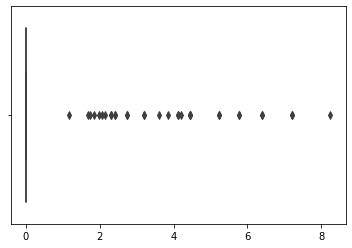

In [8]:
query = 'thanos' ## Enter search query
tokenized_query = query.split(' ')
doc_scores = bm25.get_scores(tokenized_query)
sns.boxplot(x=doc_scores)

docs = bm25.get_top_n(tokenized_query, df['line'].values, n=5)
df_search = df[df['line'].isin(docs)]
df_search[['character', 'line', 'movie']].head()

In [17]:
query = 'character' ## Enter search query
tokenized_query = query.split(' ')
doc_scores = bm25.get_scores(tokenized_query)

docs = bm25.get_top_n(tokenized_query, df['line'].values, n=5)
df_search = df[df['line'].isin(docs)]
df_search[['character', 'line', 'movie']].head()

character                                               line  \
435         TONY STARK  I know that it’s confusing. It is one thing to...   
2163        TONY STARK  Well, performance issues. You know? JARVIS, an...   
2164              LOKI                       You will all fall before me.   
2172  NATASHA ROMANOFF                                         I see ’em.   
6508      STEVE ROGERS                       Nope.  I don’t think I will.   

                  movie  
435          Iron Man 2  
2163       The Avengers  
2164       The Avengers  
2172       The Avengers  
6508  Avengers: Endgame

#### Google Universal Sentence Encoder

In [10]:
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.metrics.pairwise import linear_kernel

In [11]:
#Model load through URL path:

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

#Create function for using model training
def embed(input):
    return model(input)

In [12]:
## Training
Model_USE= embed(df.line)

## Save model
exported = tf.train.Checkpoint(v=tf.Variable(Model_USE))
exported.f = tf.function(
    lambda  x: exported.v * x,
    input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])
tf.saved_model.save(exported,os.getcwd()+'\\pretrained_model\\' + 'TrainModel')

INFO:tensorflow:Assets written to: C:\Users\ramos\OneDrive\Documents\SyracuseUniversity\9th_Quarter\IST736\Project\pretrained_model\TrainModel\assets


INFO:tensorflow:Assets written to: C:\Users\ramos\OneDrive\Documents\SyracuseUniversity\9th_Quarter\IST736\Project\pretrained_model\TrainModel\assets


In [13]:
## Function for Document Search
def SearchDocument(query, topn=10):
    
    ## Create Query
    q =[query]
    
    # embed the query for calcluating the similarity
    Q_Train = embed(q)
    
    ## Load Model
    imported_m = tf.saved_model.load(os.getcwd()+'\\pretrained_model\\' + 'TrainModel')
    loadedmodel = imported_m.v.numpy()
    
    # Calculate the Similarity
    linear_similarities = linear_kernel(Q_Train, loadedmodel).flatten()
    # return linear_similarities

    #Sort top 10 index with similarity score
    Top_index_doc = linear_similarities.argsort()[:-(topn + 1):-1]
     
    # sort by similarity score
    linear_similarities.sort()
    a = df.loc[df.index.isin(Top_index_doc)].reset_index(drop=True)
    a['Score'] = linear_similarities[:-(topn+1):-1]
    
    return a.sort_values(['Score'], ascending=False)[['character', 'line', 'movie', 'year', 'Score']]

In [19]:
SearchDocument('character dies')

character                   line                                movie  \
0  JAMES RHODES         Vanko’s alive?                           Iron Man 2   
1          LOKI        Father is dead.                                 Thor   
2  STEVE ROGERS      You lose someone?  Captain America: The Winter Soldier   
3  STEVE ROGERS                 Stark!              Avengers: Age of Ultron   
4  STEVE ROGERS            Fatalities?              Avengers: Age of Ultron   
5  STEVE ROGERS               Suit up.           Captain America: Civil War   
6  PETER PARKER               Footage?               Spider-Man: Homecoming   
7          THOR             Both dead.               Avengers: Infinity War   
8          THOR  Killed by a dark elf.               Avengers: Infinity War   
9          THOR      Noobmaster again?                    Avengers: Endgame   

   year     Score  
0  2010  0.414177  
1  2011  0.372609  
2  2014  0.355951  
3  2015  0.354970  
4  2015  0.347357  
5  2016  0.343662  
6  2017  0.339325  
7  2018  0.334100  
8  2018  0.326829  
9  2019  0.326669

In [15]:
SearchDocument('thanos')

character                                               line  \
0  BRUCE BANNER                   Thanos is coming. He's coming...   
1          THOR        You seem to know a great deal about Thanos.   
2          THOR                           The Thanos killing kind.   
3  BRUCE BANNER  There's an Ant-Man and a Spider-Man? Okay, loo...   
4  PETER PARKER                        So, you're not with Thanos?   
5          THOR               So is facing Thanos without that ax.   
6          THOR                                   BRING ME THANOS!   
7  JAMES RHODES  It’s been twenty-three days since Thanos came ...   
8  BRUCE BANNER                                       Like Thanos.   
9  BRUCE BANNER                Strange gave Thanos the Time Stone.   

                    movie  year     Score  
0  Avengers: Infinity War  2018  0.827228  
1  Avengers: Infinity War  2018  0.813733  
2  Avengers: Infinity War  2018  0.735027  
3  Avengers: Infinity War  2018  0.734338  
4  Avengers: Infinity War  2018  0.726994  
5  Avengers: Infinity War  2018  0.690775  
6  Avengers: Infinity War  2018  0.681241  
7       Avengers: Endgame  2019  0.673123  
8       Avengers: Endgame  2019  0.636227  
9       Avengers: Endgame  2019  0.629709

In [16]:
SearchDocument('hulk')

character                                               line  \
0        TONY STARK                                    We have a Hulk.   
1  NATASHA ROMANOFF                          Thor, report on the Hulk?   
2      BRUCE BANNER  The world just saw the Hulk. The real Hulk, fo...   
3      STEVE ROGERS                                       Avengers...!   
4      PETER PARKER                                      The Avengers?   
5              THOR           Hulk, I need you to do something for me.   
6      BRUCE BANNER  What are you saying? I’ve been Hulk for two ye...   
7              THOR  So do I, but we have no choice. Surtur destroy...   
8              LOKI  Well, for one thing, I'm not Asgardian. And fo...   
9      BRUCE BANNER  Oh no, oh no you don't. This isn't going to be...   

                     movie  year     Score  
0             The Avengers  2012  0.749868  
1  Avengers: Age of Ultron  2015  0.740821  
2  Avengers: Age of Ultron  2015  0.695066  
3  Avengers: Age of Ultron  2015  0.676475  
4   Spider-Man: Homecoming  2017  0.641309  
5           Thor: Ragnarok  2017  0.604614  
6           Thor: Ragnarok  2017  0.602069  
7           Thor: Ragnarok  2017  0.580821  
8   Avengers: Infinity War  2018  0.574890  
9   Avengers: Infinity War  2018  0.558523